# Problem Description
Wake county located in North Carolina is one of the fastest growing counties in the USA with large influx of immigrants from other states and nationalities calling it their home.Its major city Raleigh has a high concentration of highly educated workforce with a good mix of young and middle aged population drives the economy of the state and opens up tremendous possibilities for new businesses to thrive.North carolina has been influenced greatly by settlers from New England and Hispanic immigrants.North carolina is also famous for its barbecue and bacon but other cuisines are starting to becoming popular. This opens up a possibility to create a recommender system for anyone who wants to open a new restaurant that can be successful in the area.We will attempt to determine a good location to open a new restaurant by exploring the neighbourhoods for restaurants distribution  within Raleigh using recently learnt data science techniques

The following datasets will be used for our assessment
Raleigh restaurants info using Foursquare
Raleigh Neighbourhoods 
1. https://en.wikipedia.org/wiki/Raleigh,_North_Carolina_neighborhoods 
2. https://en.wikipedia.org/wiki/Category:Neighborhoods_in_Raleigh,_North_Carolina
3. Restaraunt density data from Foursquare apis
4. Classification of types of restaurants based on cuisines

## Data exploration and Presentation 
The data from the above datasets will be read via pandas dataframe and cleaned up to classify Restaurants to Neighbouhoods.Then we will be able to cluster the restaurants in the area and as well as correlate the quality of restaurants again based on cuisine to the neighbourhood which would potentially provide us insights on the type of restaurant that can be setup. We will then perform data clustering using KNN on the restaurant data and generate visualisation plots and graphs that will aid in the final decision
Recommendation Success Criteria using 

## Importing Data manipulation and Visualization Libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import reverse_geocode
import folium
from geopy.geocoders import Nominatim
import numpy as np
import matplotlib as mpl
import pandas as pd
from sklearn import datasets
import geocoder
from geopy.exc import GeocoderTimedOut
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

### We begin by exploring the Raleigh City.We identified that there are 32 distinct neighbourhoods in Raleigh.We sourced this data from wikipedia and obtained the location information.We then removed some overlaping neighbourhoods and cleaned this data for the final set of 27 neighbhourhoods

In [2]:
Raleigh_Neighborhoods=[]
response_obj=requests.get('https://en.wikipedia.org/wiki/Category:Neighborhoods_in_Raleigh,_North_Carolina').text
soup=BeautifulSoup(response_obj,'lxml')
mydivs = soup.findAll("div", {"class": "mw-category-group"})
for div in mydivs:
    for l in div.findAll('a'):
        for title in l:
            Raleigh_Neighborhoods.append(title)
Raleigh_Neighborhoods.remove('Raleigh, North Carolina neighborhoods')
Raleigh_Neighborhoods=[s.replace('Historic District','') for s in Raleigh_Neighborhoods]
Raleigh_Neighborhoods=[s.replace('(North Carolina)','') for s in Raleigh_Neighborhoods]
Raleigh_Neighborhoods=[s.replace('(Raleigh, North Carolina)','') for s in Raleigh_Neighborhoods]
Raleigh_Neighborhoods=[s.strip(' ') for s in Raleigh_Neighborhoods]
Raleigh_Neighborhoods=[s+(',Raleigh, North Carolina') for s in Raleigh_Neighborhoods]

In [3]:
df_ral=pd.DataFrame(Raleigh_Neighborhoods)
df_ral=df_ral.rename(columns={0:'Neighborhoods'})
df_ral=df_ral.drop_duplicates(keep='first')
df_ral

,Neighborhoods
0,"Battery Heights,Raleigh, North Carolina"
1,"Bloomsbury,Raleigh, North Carolina"
2,"Boylan Heights,Raleigh, North Carolina"
3,"Cameron Park,Raleigh, North Carolina"
4,"Cameron Village,Raleigh, North Carolina"
6,"Capitol Area,Raleigh, North Carolina"
7,"Capitol Heights,Raleigh, North Carolina"
8,Centennial Campus of North Carolina State Univ...
9,"Depot,Raleigh, North Carolina"
10,"East Raleigh–South Park,Raleigh, North Carolina"


In [4]:
geolocator=Nominatim(user_agent='Raleigh')
city=[]
lat=[]
long=[]
try:
    for i in Raleigh_Neighborhoods:
        location = geolocator.geocode(i)
        if location is not None:
            city.append(i)
            lat.append(location.latitude)
            long.append(location.longitude)
except GeocoderTimedOut as e:
    print("Error: geocode failed on input %s with message %s"%(location, e.msg))

In [5]:
df=pd.DataFrame({'Neighborhoods':city,'latitude':lat,'longitude':long})
df=df.drop_duplicates(subset='latitude',keep='first')
df

,Neighborhoods,latitude,longitude
0,"Battery Heights,Raleigh, North Carolina",35.777058,-78.617563
1,"Bloomsbury,Raleigh, North Carolina",35.808897,-78.648599
2,"Boylan Heights,Raleigh, North Carolina",35.774159,-78.652102
3,"Cameron Park,Raleigh, North Carolina",35.785779,-78.655470
4,"Cameron Village,Raleigh, North Carolina",35.790361,-78.660413
6,"Capitol Area,Raleigh, North Carolina",35.789884,-78.621851
8,"Depot,Raleigh, North Carolina",35.780398,-78.639099
9,"Fayetteville Street (Raleigh),Raleigh, North C...",35.768875,-78.641336
11,"Glenwood Avenue,Raleigh, North Carolina",35.886724,-78.744499
12,"Hayes Barton,Raleigh, North Carolina",35.802755,-78.646583


### In addtion to the above we also sourced data of the 7 major Raliegh area classification listed below.We ran the neighbourhood data using the Nominatim library but this yeilded incorrect latitude and longitude information so we had to manually cleaned up this data.Then we created a dataframe using the Neighbourhood,latitude and longitude list data

In [6]:
# NorthwestRaleigh,Raleigh,NC,35.8592131,-78.7820008
# North Raleigh,Raleigh,NC,35.9103757,-78.6801222,12
# NortheastRaleigh,Raleigh,NC,35.8497131,-78.6123274
# SouthwestRaleigh,Raleigh,NC,35.7673757,-78.7586629
# SoutheastRaleigh,Raleigh,NC,35.7520018,-78.6401082
# EastRaleigh,Raleigh,NC,35.7924627,-78.6189683
# raleigh=['North Raleigh,Raleigh,nc','Southwest raleigh,Raleigh,nc','Southeast raleigh,Raleigh,nc'
#         ,'east raleigh,Raleigh,nc']
# raliegh_side=[]
# lat=[]
# long=[]
# try:
#     for i in raleigh:
#         location = geolocator.geocode(i)
#         if location is not None:
#             raliegh_side.append(i)
#             lat.append(location.latitude)
#             long.append(location.longitude)
# except GeocoderTimedOut as e:
#     print("Error: geocode failed on input %s with message %s"%(location, e.msg))
# df_ral=pd.DataFrame({'Raleigh_Side':raliegh_side,'latitude':lat,'longitude':long})
# df_ral
raleigh=['Northwest Raleigh,Raleigh,NC','North Raleigh,Raleigh,NC','Northeast Raleigh,Raleigh,NC',
              'Southwest Raleigh,Raleigh,NC','Southeast Raleigh,Raleigh,NC','East Raleigh,Raleigh,NC','West Raleigh,Raleigh,NC']
raleigh_lat=[35.8592131,35.9103757,35.8497131,35.7673757,35.7520018,35.7924627,35.7868173]
raleigh_long=[-78.7820008,-78.6801222,-78.6123274,-78.7586629,-78.6401082,-78.6189683,-78.6726475]

df_ral = pd.DataFrame(list(zip(raleigh, raleigh_lat,raleigh_long)), 
               columns =['Raleigh_Side', 'latitude','longitude']) 
df_ral

,Raleigh_Side,latitude,longitude
0,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001
1,"North Raleigh,Raleigh,NC",35.910376,-78.680122
2,"Northeast Raleigh,Raleigh,NC",35.849713,-78.612327
3,"Southwest Raleigh,Raleigh,NC",35.767376,-78.758663
4,"Southeast Raleigh,Raleigh,NC",35.752002,-78.640108
5,"East Raleigh,Raleigh,NC",35.792463,-78.618968
6,"West Raleigh,Raleigh,NC",35.786817,-78.672647


## With the neighbourhood dataframe we will use this feed the location data to our foursquare api call to get list of 50 restaurants within 5km radius in each of the neighbourhood

In [7]:
CLIENT_ID = 'EA0WZQZP3HJVT4DTV02NLEGNIFSAHPTRXK50TAZIIYY5A5OG' # your Foursquare ID
CLIENT_SECRET = '5X1OY3KPXNEM1F5CVU2A124DQUNH3GC0TDP1MP1M0FX31D1Z' # your Foursquare Secret

# CLIENT_ID ='BCZ1DKRCRZTMRZPSY5HHEQTQJNZCITUWFO3CLRCIUQOOGSFB'
# CLIENT_SECRET ='WPWOCZ3QZVXYQCXPKBPKSKW1CQSFBLTKAWYGSS0WBXJKZZZW'
VERSION = '20190104'
LIMIT = 50
radius= 5000
latitude = 35.787743
longitude = -78.644257
search_query='Restaurants'
restID=[]
restName=[]
restCity=[]
restLat=[]
restLng=[]
restCat=[]

In [8]:
# url1 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude,longitude,VERSION,search_query,radius,LIMIT)
# results = requests.get(url1).json()
# r=results['response']['groups'][0]['items']
# for a in range(len(r)):
#      print(r[a]['venue']['name'],r[a]['venue']['name'])

In [9]:
for lat ,lng in zip(df_ral['latitude'],df_ral['longitude']):  
    url1 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, lat,lng, VERSION)
    results = requests.get(url1).json()
    print(results)

{'meta': {'code': 200, 'requestId': '5e31ac7b618f43001b97e1d0'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': '$-$$$$', 'key': 'price'}, {'name': 'Open now', 'key': 'openNow'}]}, 'suggestedRadius': 5110, 'headerLocation': 'Current map view', 'headerFullLocation': 'Current map view', 'headerLocationGranularity': 'unknown', 'totalResults': 74, 'suggestedBounds': {'ne': {'lat': 35.906915263969374, 'lng': -78.7508141097986}, 'sw': {'lat': 35.81362945664305, 'lng': -78.82354090126043}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4d4ad0679544a093b83936e7', 'name': 'Enterprise Rent-A-Car', 'location': {'address': '1008 Rental Car Dr', 'lat': 35.868529, 'lng': -78.800698, 'labeledLatLngs': [{'label': 'display', 'lat': 35.868529, 'lng': -78.800698}], 'distance': 1980, 'postalCode

{'meta': {'code': 200, 'requestId': '5e31ac57c546f3001bbb1fb6'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': '$-$$$$', 'key': 'price'}, {'name': 'Open now', 'key': 'openNow'}]}, 'suggestedRadius': 5676, 'headerLocation': 'Raleigh', 'headerFullLocation': 'Raleigh', 'headerLocationGranularity': 'city', 'totalResults': 174, 'suggestedBounds': {'ne': {'lat': 35.90852841300363, 'lng': -78.64765076828951}, 'sw': {'lat': 35.88537082230321, 'lng': -78.70554762497022}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '56a959f9498e312c0d5e82c0', 'name': 'Duck Donuts', 'location': {'address': '8323 Creedmoor Rd', 'crossStreet': 'Strickland Rd', 'lat': 35.9007599, 'lng': -78.68116970000001, 'labeledLatLngs': [{'label': 'display', 'lat': 35.9007599, 'lng': -78.68116970000001}], 'distance'

{'meta': {'code': 200, 'requestId': '5e31ac679da7ee001b5fd9c3'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': '$-$$$$', 'key': 'price'}, {'name': 'Open now', 'key': 'openNow'}]}, 'suggestedRadius': 2956, 'headerLocation': 'Raleigh', 'headerFullLocation': 'Raleigh', 'headerLocationGranularity': 'city', 'totalResults': 195, 'suggestedBounds': {'ne': {'lat': 35.87171954174736, 'lng': -78.59749848282247}, 'sw': {'lat': 35.83536540130853, 'lng': -78.62380054843702}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4d977667d1bca090ea5662b4', 'name': "The Butcher's Market", 'location': {'address': '5045 Falls of Neuse Rd', 'crossStreet': 'at Millbrook Rd', 'lat': 35.85011010753286, 'lng': -78.615286259506, 'labeledLatLngs': [{'label': 'display', 'lat': 35.85011010753286, 'lng': -78.

{'meta': {'code': 200, 'requestId': '5e31ac3c47e0d6001b24bbad'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': '$-$$$$', 'key': 'price'}, {'name': 'Open now', 'key': 'openNow'}]}, 'suggestedRadius': 3535, 'headerLocation': 'Cary', 'headerFullLocation': 'Cary', 'headerLocationGranularity': 'city', 'totalResults': 196, 'suggestedBounds': {'ne': {'lat': 35.77812630055962, 'lng': -78.73606477}, 'sw': {'lat': 35.75146481498297, 'lng': -78.78623203}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5446fccc498e95fbd0b7b67f', 'name': 'Harris Teeter', 'location': {'address': '885 Walnut St', 'lat': 35.774908179373874, 'lng': -78.76486595528766, 'labeledLatLngs': [{'label': 'display', 'lat': 35.774908179373874, 'lng': -78.76486595528766}], 'distance': 1008, 'postalCode': '27511', 'cc':

{'meta': {'code': 200, 'requestId': '5e31ac736001fe001b31fed2'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': '$-$$$$', 'key': 'price'}, {'name': 'Open now', 'key': 'openNow'}]}, 'suggestedRadius': 3156, 'headerLocation': 'Raleigh', 'headerFullLocation': 'Raleigh', 'headerLocationGranularity': 'city', 'totalResults': 157, 'suggestedBounds': {'ne': {'lat': 35.779432051270774, 'lng': -78.63065222855087}, 'sw': {'lat': 35.73092661618763, 'lng': -78.66573711601617}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4f32f6a3e4b0547a0d5e50f0', 'name': 'CrossFit Invoke', 'location': {'address': '1701 S Saunders St', 'crossStreet': 'at Penmarc Dr', 'lat': 35.757952639525755, 'lng': -78.64849128661517, 'labeledLatLngs': [{'label': 'display', 'lat': 35.757952639525755, 'lng': -78.648491

{'meta': {'code': 200, 'requestId': '5e31ac59c546f3001bbb284f'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': '$-$$$$', 'key': 'price'}, {'name': 'Open now', 'key': 'openNow'}]}, 'suggestedRadius': 2665, 'headerLocation': 'Raleigh', 'headerFullLocation': 'Raleigh', 'headerLocationGranularity': 'city', 'totalResults': 202, 'suggestedBounds': {'ne': {'lat': 35.81128476163522, 'lng': -78.60323598970882}, 'sw': {'lat': 35.77721289152028, 'lng': -78.64244523775659}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4adcee45f964a520a36221e3', 'name': 'Oakwood Dog Park', 'location': {'address': '910 Brookside Dr', 'crossStreet': 'at Monroe Dr', 'lat': 35.79036561835162, 'lng': -78.62376235272075, 'labeledLatLngs': [{'label': 'display', 'lat': 35.79036561835162, 'lng': -78.62376235272

{'meta': {'code': 200, 'requestId': '5e31ac47d03993001b4a8b19'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': '$-$$$$', 'key': 'price'}, {'name': 'Open now', 'key': 'openNow'}]}, 'suggestedRadius': 2128, 'headerLocation': 'Raleigh', 'headerFullLocation': 'Raleigh', 'headerLocationGranularity': 'city', 'totalResults': 147, 'suggestedBounds': {'ne': {'lat': 35.79207093413693, 'lng': -78.658224186917}, 'sw': {'lat': 35.777068383124416, 'lng': -78.68016949260085}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b1e83def964a520cf1a24e3', 'name': 'Carmichael Gym', 'location': {'address': '2611 Cates Ave', 'crossStreet': 'at Morrill Dr.', 'lat': 35.783242237427466, 'lng': -78.67207957730714, 'labeledLatLngs': [{'label': 'display', 'lat': 35.783242237427466, 'lng': -78.672079577307

### We obtain the following data and save it in a list.We will use this for our various analysis going forward
1. Neighbourhood Latiude
2. Neighbourhood Longitude
3. Venue Name 
4. Venue Category
5. Venue Latitude
6. Venue Longitude

In [10]:
restCity_Lat=[]
restCity_Lng=[]
restName_Ral=[]
restCity_Ral=[]
restLat_Ral=[]
restLng_Ral=[]
restCat_Ral=[]
for neigh,lat ,lng in zip(df_ral['Raleigh_Side'],df_ral['latitude'],df_ral['longitude']):  
    url1 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat,lng,VERSION,search_query,radius,LIMIT)
    results = requests.get(url1).json()
    r=results['response']['groups'][0]['items']
    for a in range(len(r)):   
        restCity_Ral.append(neigh)
        restCity_Lat.append(lat)
        restCity_Lng.append(lng)
        restName_Ral.append(r[a]['venue']['name'])
        restCat_Ral.append(r[a]['venue']['categories'][0]['name'])
        restLat_Ral.append(r[a]['venue']['location']['lat'])
        restLng_Ral.append(r[a]['venue']['location']['lng'])

#print(neigh,r[a]['venue']['name'],r[a]['venue']['categories'][0]['name'],r[a]['venue']['location']['lat'],r[a]['venue']['location']['lng'])

### We used the list data from our Foursquare api call to create a dataframe final_Ral.From this dataframe 
1. we were able to get a count of venue categories by neighbourhood.
2. Most popular cuisine types across multiple neighbourhoods

Looks like North Raleigh has the least number of restaurants.Unsurprisingly American,Mexican and Pizza seem to top the charts.We then get a list of top ten restaurant categories and present a bar graph

In [11]:
final_Ral=pd.DataFrame(list(zip(restCity_Ral,restCity_Lat,restCity_Lng,restName_Ral,restCat_Ral,restLat_Ral,restLng_Ral)),columns=['Neighbourhood','Neigh_Lat','Neigh_Lng','Venue','Venue_Category','Latitude','Longitude'])
final_Ral.Neighbourhood.value_counts()
final_Ral

,Neighbourhood,Neigh_Lat,Neigh_Lng,Venue,Venue_Category,Latitude,Longitude
0,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,Los Tres Magueyes,Mexican Restaurant,35.859641,-78.820235
1,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,Dame's Chicken & Waffles,American Restaurant,35.830637,-78.769707
2,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,Herons,New American Restaurant,35.829642,-78.764002
3,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,Peng's Asian Cuisine,Chinese Restaurant,35.862487,-78.818379
4,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,Chick-fil-A,Fast Food Restaurant,35.829273,-78.769781
5,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,Bulkogi Korean BBQ,Food Truck,35.836116,-78.811333
6,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,Burgerfi,Burger Joint,35.876774,-78.794550
7,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,The Angus Barn,Steakhouse,35.899145,-78.763773
8,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,Vintage Carolina,New American Restaurant,35.876341,-78.794457
9,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,Carmen's Cuban Cafe,Cuban Restaurant,35.862309,-78.818172


In [12]:
final_Ral.groupby(['Venue_Category']).count()

,Neighbourhood,Neigh_Lat,Neigh_Lng,Venue,Latitude,Longitude
Venue_Category,,,,,,
American Restaurant,32,32,32,32,32,32
Asian Restaurant,9,9,9,9,9,9
BBQ Joint,5,5,5,5,5,5
Bagel Shop,2,2,2,2,2,2
Bakery,12,12,12,12,12,12
Breakfast Spot,12,12,12,12,12,12
Burger Joint,15,15,15,15,15,15
Burrito Place,2,2,2,2,2,2
Café,13,13,13,13,13,13


In [13]:
# for neigh,lat ,lng in zip(df['Neighborhoods'],df['latitude'],df['longitude']):  
#     url1 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat,lng,VERSION,search_query,radius,LIMIT)
#     results = requests.get(url1).json()
#     r=results['response']['groups'][0]['items']
#     for a in range(len(r)):
#         restCity.append(neigh)
#         restName.append(r[a]['venue']['name'])
#         restCat.append(r[a]['venue']['categories'][0]['name'])
#         restLat.append(r[a]['venue']['location']['lat'])
#         restLng.append(r[a]['venue']['location']['lng'])        
#         #print(neigh,r[a]['venue']['name'],r[a]['venue']['categories'][0]['name'],r[a]['venue']['location']['lat'],r[a]['venue']['location']['lng'])
#         #print(r[a]['venue']['name'],r[a]['venue']['categories'][0]['name'],r[a]['venue'])
         

In [14]:
# final=pd.DataFrame(list(zip(restCity,restName,restCat,restLat,restLng)),columns=['Neighbourhood','Name','Category','Latitude','Longitude'])
# final.sort_values(by=['Name'])
# final.shape

In [15]:
ral_lat=35.787743
ral_long=-78.644257
map_restaurants=folium.Map(location=[ral_lat,ral_long],zoom_start=11,tiles="openstreetmap")

In [16]:
x=np.arange(len(raleigh))
rainbow=["#00ff00","#ff00ff","#0000ff","#ffa500","#ff0000","#ff00bb"]
final_Ral.head(5)

,Neighbourhood,Neigh_Lat,Neigh_Lng,Venue,Venue_Category,Latitude,Longitude
0,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,Los Tres Magueyes,Mexican Restaurant,35.859641,-78.820235
1,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,Dame's Chicken & Waffles,American Restaurant,35.830637,-78.769707
2,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,Herons,New American Restaurant,35.829642,-78.764002
3,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,Peng's Asian Cuisine,Chinese Restaurant,35.862487,-78.818379
4,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,Chick-fil-A,Fast Food Restaurant,35.829273,-78.769781


### Now using Folium we will visualize the restaurants in the various Raleigh neighbourhoods

In [17]:
for lat,long,poi,distr in zip(final_Ral['Latitude'],final_Ral['Longitude'],
                              final_Ral['Venue_Category'],final_Ral['Neighbourhood']):
    label=folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat,long],
        radius = 7,
        popup=label,
        color=rainbow[raleigh.index(distr)-1],
        fill=True,
        fill_color=rainbow[raleigh.index(distr)-1],
        fill_opacity=0.3).add_to(map_restaurants)
    
map_restaurants

In [18]:
### Number of Unique Categories in the Dataframe 
print('There are {} unique categories.'.format(len(final_Ral['Venue_Category'].unique())))
## We can check some of the categories randomly  
print (final_Ral[['Venue_Category']][11:20])
final_Ral['Venue_Category'].value_counts()

There are 54 unique categories.
          Venue_Category
11  Fast Food Restaurant
12     Indian Restaurant
13    Seafood Restaurant
14        Sandwich Place
15   American Restaurant
16            Steakhouse
17      Sushi Restaurant
18   American Restaurant
19            Steakhouse


American Restaurant                32
Pizza Place                        26
Mexican Restaurant                 26
Mediterranean Restaurant           16
Burger Joint                       15
Fast Food Restaurant               14
Restaurant                         14
Café                               13
Breakfast Spot                     12
Steakhouse                         12
Bakery                             12
Italian Restaurant                 11
Seafood Restaurant                 11
Sushi Restaurant                   10
Sandwich Place                     10
Asian Restaurant                    9
Southern / Soul Food Restaurant     7
Deli / Bodega                       7
Indian Restaurant                   6
Chinese Restaurant                  6
Food Truck                          6
Hot Dog Joint                       5
BBQ Joint                           5
Gastropub                           5
Donut Shop                          5
Japanese Restaurant                 5
Fried Chicke

In [19]:
final_Ral_clusters_top10=final_Ral['Venue_Category'].value_counts()[0:10].to_frame(name='frequency')
final_Ral_clusters_top10=final_Ral_clusters_top10.reset_index()
final_Ral_clusters_top10.rename(index=str,columns={"index":"Venue_Category","frequency":"frequency"},inplace=True)
final_Ral_clusters_top10

,Venue_Category,frequency
0,American Restaurant,32
1,Pizza Place,26
2,Mexican Restaurant,26
3,Mediterranean Restaurant,16
4,Burger Joint,15
5,Fast Food Restaurant,14
6,Restaurant,14
7,Café,13
8,Breakfast Spot,12
9,Steakhouse,12


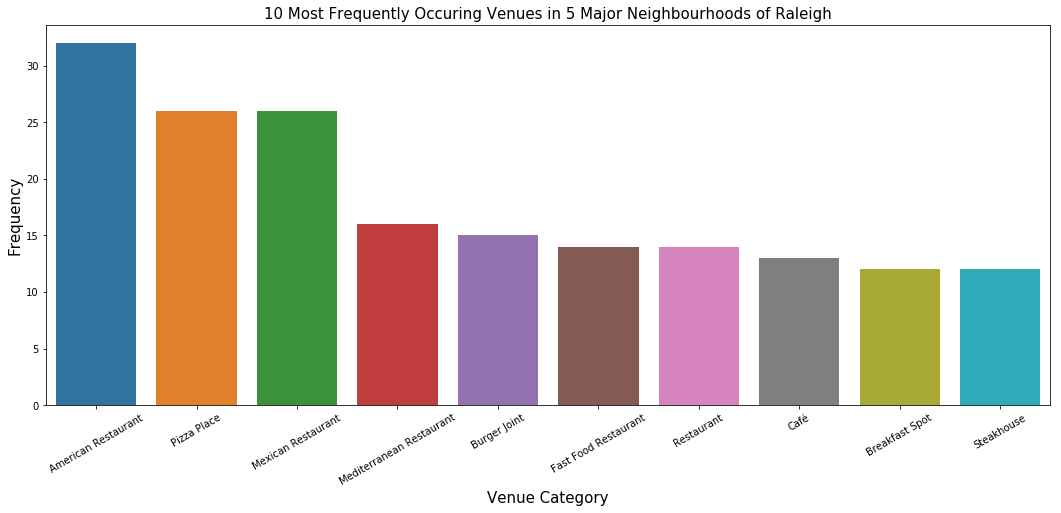

In [20]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="frequency", data=final_Ral_clusters_top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in 5 Major Neighbourhoods of Raleigh', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

### We use one hot encoder to perform “binarization” of the venue category and include it as a feature to train the model.We finally obtain then the top 5 restaurants in each neighbourhood by frequency

In [21]:
final_Ral_onehot=pd.get_dummies(final_Ral[['Venue_Category']],prefix="",prefix_sep="")
final_Ral_onehot['Neighbourhood']=final_Ral['Neighbourhood']
fixed_cols= [final_Ral_onehot.columns[-1]] + list(final_Ral_onehot.columns[:-1])
final_Ral_onehot=final_Ral_onehot[fixed_cols]

In [22]:
final_Ral_onehot_grouped=final_Ral_onehot.groupby('Neighbourhood').mean().reset_index()
final_Ral_onehot_grouped.index=np.arange(1,len(final_Ral_onehot_grouped)+1)
final_Ral_onehot_grouped

,Neighbourhood,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Breakfast Spot,Burger Joint,Burrito Place,Café,...,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,"East Raleigh,Raleigh,NC",0.08,0.04,0.02,0.00,0.08,0.04,0.04,0.00,0.04,...,0.06,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,"North Raleigh,Raleigh,NC",0.02,0.04,0.00,0.04,0.04,0.04,0.04,0.00,0.08,...,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,"Northeast Raleigh,Raleigh,NC",0.14,0.00,0.02,0.00,0.02,0.06,0.06,0.00,0.00,...,0.00,0.02,0.02,0.02,0.00,0.02,0.02,0.00,0.00,0.02
4,"Northwest Raleigh,Raleigh,NC",0.12,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.04,...,0.00,0.08,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,"Southeast Raleigh,Raleigh,NC",0.14,0.06,0.04,0.00,0.04,0.02,0.06,0.00,0.02,...,0.06,0.02,0.04,0.00,0.02,0.00,0.00,0.00,0.02,0.00
6,"Southwest Raleigh,Raleigh,NC",0.06,0.04,0.02,0.00,0.04,0.02,0.04,0.00,0.02,...,0.00,0.04,0.02,0.00,0.00,0.00,0.00,0.02,0.00,0.02
7,"West Raleigh,Raleigh,NC",0.08,0.00,0.00,0.00,0.02,0.04,0.04,0.04,0.06,...,0.02,0.02,0.06,0.02,0.00,0.00,0.00,0.00,0.00,0.00


In [23]:
top_ven=5
for places in final_Ral_onehot_grouped['Neighbourhood']:
    print("%%%%%"+places+"%%%%%")
    temp=final_Ral_onehot_grouped[final_Ral_onehot_grouped['Neighbourhood']==places].T.reset_index()
    temp.columns=['Venue','Freq']
    temp=temp.iloc[1:]
    temp['Freq']=temp['Freq'].astype(float)
    print(temp.sort_values('Freq',ascending=False).reset_index(drop=True).head(top_ven))
    print('\n')

%%%%%East Raleigh,Raleigh,NC%%%%%
                             Venue  Freq
0              American Restaurant  0.08
1                           Bakery  0.08
2                        Gastropub  0.06
3  Southern / Soul Food Restaurant  0.06
4                      Pizza Place  0.06


%%%%%North Raleigh,Raleigh,NC%%%%%
                Venue  Freq
0         Pizza Place  0.20
1  Mexican Restaurant  0.12
2                Café  0.08
3          Restaurant  0.04
4  Italian Restaurant  0.04


%%%%%Northeast Raleigh,Raleigh,NC%%%%%
                  Venue  Freq
0   American Restaurant  0.14
1  Fast Food Restaurant  0.08
2            Restaurant  0.08
3        Breakfast Spot  0.06
4          Burger Joint  0.06


%%%%%Northwest Raleigh,Raleigh,NC%%%%%
                  Venue  Freq
0   American Restaurant  0.12
1            Steakhouse  0.08
2           Pizza Place  0.08
3    Mexican Restaurant  0.08
4  Fast Food Restaurant  0.06


%%%%%Southeast Raleigh,Raleigh,NC%%%%%
                 Venue  Freq
0  

In [24]:
final_Ral_onehot_grouped

,Neighbourhood,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Breakfast Spot,Burger Joint,Burrito Place,Café,...,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,"East Raleigh,Raleigh,NC",0.08,0.04,0.02,0.00,0.08,0.04,0.04,0.00,0.04,...,0.06,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,"North Raleigh,Raleigh,NC",0.02,0.04,0.00,0.04,0.04,0.04,0.04,0.00,0.08,...,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,"Northeast Raleigh,Raleigh,NC",0.14,0.00,0.02,0.00,0.02,0.06,0.06,0.00,0.00,...,0.00,0.02,0.02,0.02,0.00,0.02,0.02,0.00,0.00,0.02
4,"Northwest Raleigh,Raleigh,NC",0.12,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.04,...,0.00,0.08,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,"Southeast Raleigh,Raleigh,NC",0.14,0.06,0.04,0.00,0.04,0.02,0.06,0.00,0.02,...,0.06,0.02,0.04,0.00,0.02,0.00,0.00,0.00,0.02,0.00
6,"Southwest Raleigh,Raleigh,NC",0.06,0.04,0.02,0.00,0.04,0.02,0.04,0.00,0.02,...,0.00,0.04,0.02,0.00,0.00,0.00,0.00,0.02,0.00,0.02
7,"West Raleigh,Raleigh,NC",0.08,0.00,0.00,0.00,0.02,0.04,0.04,0.04,0.06,...,0.02,0.02,0.06,0.02,0.00,0.00,0.00,0.00,0.00,0.00


#### Finally the 10 most common venues across each Neighbourhood is listed and we will merge this dataframe with our kluster labels for our final dataset

In [25]:
## Define a Function to select the top 10 rows (According to the Values) 

def com_venu(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Neighbourhood_top10_venues_sorted = pd.DataFrame(columns=columns)
Neighbourhood_top10_venues_sorted['Neighbourhood'] = final_Ral_onehot_grouped['Neighbourhood']

for ind in np.arange(final_Ral_onehot_grouped.shape[0]):
    Neighbourhood_top10_venues_sorted.iloc[ind, 1:] = com_venu(final_Ral_onehot_grouped.iloc[ind, :], num_top_venues)

    
Neighbourhood_top10_venues_sorted.index = np.arange(1, len(Neighbourhood_top10_venues_sorted)+1)
Neighbourhood_top10_venues_sorted.head(10)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"East Raleigh,Raleigh,NC",American Restaurant,Bakery,Pizza Place,Gastropub,Southern / Soul Food Restaurant,Asian Restaurant,Breakfast Spot,Burger Joint,Café,Italian Restaurant
2,"North Raleigh,Raleigh,NC",Pizza Place,Mexican Restaurant,Café,Mediterranean Restaurant,Asian Restaurant,Donut Shop,Bagel Shop,Bakery,Breakfast Spot,Burger Joint
3,"Northeast Raleigh,Raleigh,NC",American Restaurant,Restaurant,Fast Food Restaurant,Pizza Place,Breakfast Spot,Burger Joint,Mexican Restaurant,French Restaurant,Seafood Restaurant,Mediterranean Restaurant
4,"Northwest Raleigh,Raleigh,NC",American Restaurant,Steakhouse,Mexican Restaurant,Pizza Place,Indian Restaurant,Sandwich Place,Restaurant,Fast Food Restaurant,Food Truck,New American Restaurant
5,"Southeast Raleigh,Raleigh,NC",American Restaurant,Seafood Restaurant,Italian Restaurant,Southern / Soul Food Restaurant,Asian Restaurant,Burger Joint,BBQ Joint,Fast Food Restaurant,Bakery,Sushi Restaurant
6,"Southwest Raleigh,Raleigh,NC",Mexican Restaurant,Mediterranean Restaurant,American Restaurant,Pizza Place,Restaurant,Chinese Restaurant,Food Truck,Japanese Restaurant,Sandwich Place,Steakhouse
7,"West Raleigh,Raleigh,NC",Mediterranean Restaurant,American Restaurant,Mexican Restaurant,Café,Sushi Restaurant,Pizza Place,Breakfast Spot,Burger Joint,Burrito Place,Deli / Bodega


[26, 20, 33, 27, 33, 29, 27]


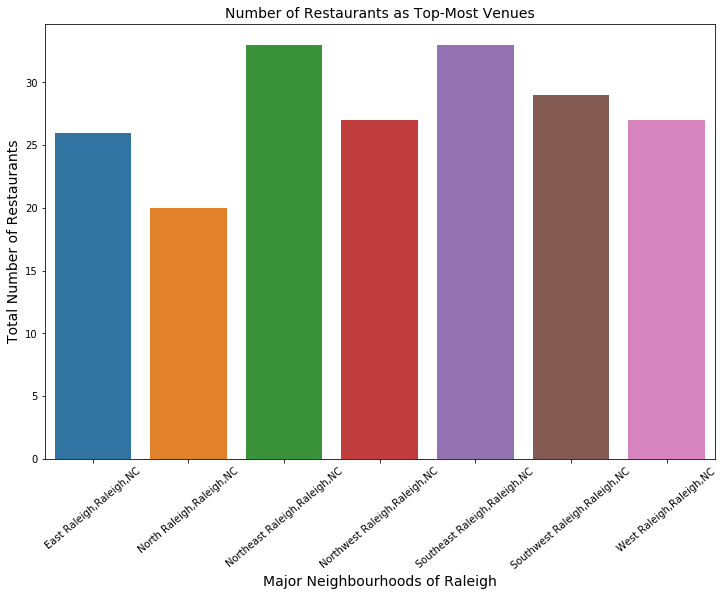

In [26]:
#try groupby to play with restaurant 
Raleigh_Neigh_Venues_restaurant = final_Ral.groupby(['Neighbourhood'])['Venue_Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
Raleigh_Neigh_Venues_restaurant = Raleigh_Neigh_Venues_restaurant.to_frame().reset_index()
Raleigh_Neigh_Venues_restaurant.columns = ['Neighbourhood', 'Number of Restaurant']

Raleigh_Neigh_Venues_restaurant.index = np.arange(1, len(Raleigh_Neigh_Venues_restaurant)+1)

list_rest_no = Raleigh_Neigh_Venues_restaurant['Number of Restaurant'].to_list()
print (list_rest_no)
fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='Neighbourhood', y='Number of Restaurant', data=Raleigh_Neigh_Venues_restaurant)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("Major Neighbourhoods of Raleigh", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Restaurants as Top-Most Venues", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()

### We will cluster these 7 neighbourhoods based on the venue categories and use K-Means clustering. So our expectation would be based on the similarities of venue categories, these districts will be clustered.

In [27]:
# distortions = []
# num_clusters = range(1, 7)
# kmean=KMeans()
# # Create a list of distortions from the kmeans function
# for i in num_clusters:
#     cluster_centers, distortion = kmeans(final_Ral[['Neighbourhood', 'Venue_Category']], i)
#     distortions.append(distortion)

# # Create a data frame with two lists - num_clusters, distortions
# elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# # Creat a line plot of num_clusters and distortions
# sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
# plt.xticks(num_clusters)
# plt.show()

In [28]:
kclusters=5
final_Ral_cluster=final_Ral_onehot_grouped.drop('Neighbourhood',1)
kmeans = KMeans(n_clusters=kclusters,random_state=0).fit(final_Ral_cluster)
print("Check the 5 cluster lables :", kmeans.labels_[0:7])
final_Ral_cluster.head(10)

Check the 5 cluster lables : [0 2 3 4 0 1 1]


,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Breakfast Spot,Burger Joint,Burrito Place,Café,Caribbean Restaurant,...,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,0.08,0.04,0.02,0.00,0.08,0.04,0.04,0.00,0.04,0.00,...,0.06,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.02,0.04,0.00,0.04,0.04,0.04,0.04,0.00,0.08,0.00,...,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.14,0.00,0.02,0.00,0.02,0.06,0.06,0.00,0.00,0.04,...,0.00,0.02,0.02,0.02,0.00,0.02,0.02,0.00,0.00,0.02
4,0.12,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.04,0.00,...,0.00,0.08,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.14,0.06,0.04,0.00,0.04,0.02,0.06,0.00,0.02,0.00,...,0.06,0.02,0.04,0.00,0.02,0.00,0.00,0.00,0.02,0.00
6,0.06,0.04,0.02,0.00,0.04,0.02,0.04,0.00,0.02,0.00,...,0.00,0.04,0.02,0.00,0.00,0.00,0.00,0.02,0.00,0.02
7,0.08,0.00,0.00,0.00,0.02,0.04,0.04,0.04,0.06,0.00,...,0.02,0.02,0.06,0.02,0.00,0.00,0.00,0.00,0.00,0.00


In [29]:
final_Ral_cluster.head()

,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Breakfast Spot,Burger Joint,Burrito Place,Café,Caribbean Restaurant,...,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,0.08,0.04,0.02,0.00,0.08,0.04,0.04,0.0,0.04,0.00,...,0.06,0.02,0.04,0.00,0.00,0.00,0.00,0.0,0.00,0.00
2,0.02,0.04,0.00,0.04,0.04,0.04,0.04,0.0,0.08,0.00,...,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
3,0.14,0.00,0.02,0.00,0.02,0.06,0.06,0.0,0.00,0.04,...,0.00,0.02,0.02,0.02,0.00,0.02,0.02,0.0,0.00,0.02
4,0.12,0.00,0.00,0.00,0.00,0.02,0.02,0.0,0.04,0.00,...,0.00,0.08,0.02,0.00,0.00,0.00,0.00,0.0,0.00,0.00
5,0.14,0.06,0.04,0.00,0.04,0.02,0.06,0.0,0.02,0.00,...,0.06,0.02,0.04,0.00,0.02,0.00,0.00,0.0,0.02,0.00


In [31]:
# add clustering labels

#Neighbourhood_top10_venues_sorted=Neighbourhood_top10_venues_sorted.drop(columns=['Cluster Label'])
Neighbourhood_top10_venues_sorted
Neighbourhood_top10_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

Raliegh_Neighbourhood_merged = df_ral

Raliegh_Neighbourhood_merged = Raliegh_Neighbourhood_merged.join \
                                         (Neighbourhood_top10_venues_sorted.set_index('Neighbourhood'), on='Raleigh_Side')
#final_Ral.head(5)
Raliegh_Neighbourhood_merged.head(100)


,Raleigh_Side,latitude,longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Northwest Raleigh,Raleigh,NC",35.859213,-78.782001,4,American Restaurant,Steakhouse,Mexican Restaurant,Pizza Place,Indian Restaurant,Sandwich Place,Restaurant,Fast Food Restaurant,Food Truck,New American Restaurant
1,"North Raleigh,Raleigh,NC",35.910376,-78.680122,2,Pizza Place,Mexican Restaurant,Café,Mediterranean Restaurant,Asian Restaurant,Donut Shop,Bagel Shop,Bakery,Breakfast Spot,Burger Joint
2,"Northeast Raleigh,Raleigh,NC",35.849713,-78.612327,3,American Restaurant,Restaurant,Fast Food Restaurant,Pizza Place,Breakfast Spot,Burger Joint,Mexican Restaurant,French Restaurant,Seafood Restaurant,Mediterranean Restaurant
3,"Southwest Raleigh,Raleigh,NC",35.767376,-78.758663,1,Mexican Restaurant,Mediterranean Restaurant,American Restaurant,Pizza Place,Restaurant,Chinese Restaurant,Food Truck,Japanese Restaurant,Sandwich Place,Steakhouse
4,"Southeast Raleigh,Raleigh,NC",35.752002,-78.640108,0,American Restaurant,Seafood Restaurant,Italian Restaurant,Southern / Soul Food Restaurant,Asian Restaurant,Burger Joint,BBQ Joint,Fast Food Restaurant,Bakery,Sushi Restaurant
5,"East Raleigh,Raleigh,NC",35.792463,-78.618968,0,American Restaurant,Bakery,Pizza Place,Gastropub,Southern / Soul Food Restaurant,Asian Restaurant,Breakfast Spot,Burger Joint,Café,Italian Restaurant
6,"West Raleigh,Raleigh,NC",35.786817,-78.672647,1,Mediterranean Restaurant,American Restaurant,Mexican Restaurant,Café,Sushi Restaurant,Pizza Place,Breakfast Spot,Burger Joint,Burrito Place,Deli / Bodega


### We will finally plot  the clusters in a leaflet map using Folium library as below

In [32]:
# create map
map_restaurants10 = folium.Map(location=[ral_lat, ral_long], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
Neighbourhoods = raleigh

# add markers to the map Neigh_Lat	Neigh_Lng
for lat, lon, poi, cluster in zip(Raliegh_Neighbourhood_merged['latitude'], 
                                  Raliegh_Neighbourhood_merged['longitude'], 
                                  Raliegh_Neighbourhood_merged['Raleigh_Side'], 
                                  Raliegh_Neighbourhood_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[Neighbourhoods.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10


In [33]:
Raleigh_Cluster1 = Raliegh_Neighbourhood_merged.loc[Raliegh_Neighbourhood_merged['Cluster Label'] == 0, 
                                    Raliegh_Neighbourhood_merged.columns[[3] + list(range(4, Raliegh_Neighbourhood_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 0: %d" %(Raleigh_Cluster1.shape[0]))
Raleigh_Cluster1


No of Neighbourhood in Cluster Label 0: 2


,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,0,American Restaurant,Seafood Restaurant,Italian Restaurant,Southern / Soul Food Restaurant,Asian Restaurant,Burger Joint,BBQ Joint,Fast Food Restaurant,Bakery,Sushi Restaurant
5,0,American Restaurant,Bakery,Pizza Place,Gastropub,Southern / Soul Food Restaurant,Asian Restaurant,Breakfast Spot,Burger Joint,Café,Italian Restaurant


In [34]:

Raleigh_Cluster2 = Raliegh_Neighbourhood_merged.loc[Raliegh_Neighbourhood_merged['Cluster Label'] == 1, 
                                    Raliegh_Neighbourhood_merged.columns[[3] + list(range(4, Raliegh_Neighbourhood_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 1: %d" %(Raleigh_Cluster2.shape[0]))
Raleigh_Cluster2

No of Neighbourhood in Cluster Label 1: 2


,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,1,Mexican Restaurant,Mediterranean Restaurant,American Restaurant,Pizza Place,Restaurant,Chinese Restaurant,Food Truck,Japanese Restaurant,Sandwich Place,Steakhouse
6,1,Mediterranean Restaurant,American Restaurant,Mexican Restaurant,Café,Sushi Restaurant,Pizza Place,Breakfast Spot,Burger Joint,Burrito Place,Deli / Bodega


In [35]:
Raleigh_Cluster3 = Raliegh_Neighbourhood_merged.loc[Raliegh_Neighbourhood_merged['Cluster Label'] == 2, 
                                    Raliegh_Neighbourhood_merged.columns[[3] + list(range(4, Raliegh_Neighbourhood_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 2: %d" %(Raleigh_Cluster3.shape[0]))
Raleigh_Cluster3

No of Neighbourhood in Cluster Label 2: 1


,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,2,Pizza Place,Mexican Restaurant,Café,Mediterranean Restaurant,Asian Restaurant,Donut Shop,Bagel Shop,Bakery,Breakfast Spot,Burger Joint


In [36]:
Raleigh_Cluster4 = Raliegh_Neighbourhood_merged.loc[Raliegh_Neighbourhood_merged['Cluster Label'] == 3, 
                                    Raliegh_Neighbourhood_merged.columns[[3] + list(range(4, Raliegh_Neighbourhood_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 3: %d" %(Raleigh_Cluster4.shape[0]))
Raleigh_Cluster4

No of Neighbourhood in Cluster Label 3: 1


,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,3,American Restaurant,Restaurant,Fast Food Restaurant,Pizza Place,Breakfast Spot,Burger Joint,Mexican Restaurant,French Restaurant,Seafood Restaurant,Mediterranean Restaurant


## Observations
From the various exploratory data anaysis and clustering operaitons performed on our dataset ,cluster 1 has the lowest number of neighbourhoods (North Raleigh) which incidently has the lowest concentration of restaurants .This could mean a potential location to open a restaurant in this area.The other insight that we could gather is that southern Raleigh seem to be overstaturated with lot of restaurants and our adivse to new potential business owners is to avoid this area if you plan to open American or Mexican restaurants.This however is a small study based on the learnings from the course.In the future we can expand our analysis by getting trending venues,restaurant ratings information to disect the data further to provide any new businesses revealing insights on the type(breakfast,sitdown,fastfood) ,cusine(American,Indian,Mexican..) ,the ideal price point that will make it a successful venture